In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
map_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\6.2 Map Data"

dep_var_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\2.2 Saving the Dependent Variables"

occupation_path = r"C:\Users\soere\OneDrive\Desktop\Python MA\0.1 Classification Data"

In [3]:
# Load the Excel file into a DataFrame
excel_data = pd.read_excel(f"{map_path}\map.xlsx")
excel_data.head()  # Display the first few rows of the DataFrame for inspection

,id_inequality,LAND,NAME,STATUS,ID,RB,TYPE,county_name,rb_name
0,1,1000,MEMEL,/,1,KON,0,Memel,Koenigsberg
1,2,1000,FISCHHAUSEN,/,2,KON,0,Fischhausen,Koenigsberg
2,4,1000,KONIGSBERG,/,4,KON,2,Koenigsberg Stadt,Koenigsberg
3,5,1000,KONIGSBERG,/,5,KON,1,Koenigsberg Land,Koenigsberg
4,6,1000,LABIAU,/,6,KON,0,Labiau,Koenigsberg


In [4]:
# Load the shapefile into a GeoDataFrame
shapefile_data = gpd.read_file(f"{map_path}\German_Empire_1907_Stat_v.1.0.shp")

shapefile_data.head()

,AREA,PERIMETER,LAND,NAME,STATUS,ID,RB,TYPE,geometry
0,855.057882,196.230610,11000,ZERBST,K,11001,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675..."
1,436.241729,151.840205,11000,DESSAU,K,11003,/,/,"POLYGON ((330133.589 5749059.269, 329077.200 5..."
2,408.685103,141.882085,11000,BERNBURG,K,11005,/,/,"MULTIPOLYGON (((277472.700 5763845.600, 278054..."
3,362.501964,122.257485,11000,COETHEN,K,11004,/,/,"POLYGON ((296544.746 5744863.172, 296534.759 5..."
4,335.383568,120.823802,11000,BALLENSTEDT,K,11006,/,/,"MULTIPOLYGON (((252119.900 5742750.000, 252311..."


In [5]:
# Merge the data
merged_data = shapefile_data.merge(excel_data, on="ID", how="left")

In [6]:
merged_data

,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,geometry,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_name
0,855.057882,196.230610,11000,ZERBST,K,11001,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,436.241729,151.840205,11000,DESSAU,K,11003,/,/,"POLYGON ((330133.589 5749059.269, 329077.200 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,408.685103,141.882085,11000,BERNBURG,K,11005,/,/,"MULTIPOLYGON (((277472.700 5763845.600, 278054...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362.501964,122.257485,11000,COETHEN,K,11004,/,/,"POLYGON ((296544.746 5744863.172, 296534.759 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335.383568,120.823802,11000,BALLENSTEDT,K,11006,/,/,"MULTIPOLYGON (((252119.900 5742750.000, 252311...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,310.911133,106.473495,1000,ISERLOHN,/,546,ARN,1,"POLYGON ((5360.700 5728030.000, 6420.500 57272...",545.0,1000.0,ISERLOHN,/,ARN,2.0,Iserlohn Stadt,Arnsberg
1058,8.736836,12.950638,1000,LUDENSCHEID,/,548,ARN,2,"POLYGON ((-2412.600 5710465.800, -2112.200 570...",549.0,1000.0,LUDENSCHEID,/,ARN,2.0,Luedenscheid,Arnsberg
1059,76.470957,60.356781,1000,FRANKFURT,/,597,WIE,2,"POLYGON ((53133.400 5572169.900, 53256.900 557...",597.0,1000.0,FRANKFURT,/,WIE,2.0,Frankfurt Main Stadt,Wiesbaden
1060,92.155299,59.425263,1000,MULHEIM,/,624,DUS,1,"POLYGON ((-61277.000 5732776.000, -60669.300 5...",623.0,1000.0,MULHEIM,/,DUS,2.0,Muelheim Ruhr Stadt,Duesseldorf


# Percentage Skills per County map

In [7]:
final_df = pd.read_csv(f"{dep_var_path}\Main_Dep.csv")

In [8]:
final_df

,id_inequality,d_Hauptberuf,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled
0,1.0,25514.0,194.671849,5581.089181,5694.943234,14043.295736,5482.0,0.214862,0.007630,0.218746,0.223209,0.550415
1,2.0,20208.0,188.102372,4557.120081,4876.411387,10586.366160,4673.0,0.231245,0.009308,0.225511,0.241311,0.523870
2,4.0,93696.0,1811.855253,33907.963841,35872.296717,22103.884188,40793.0,0.435376,0.019338,0.361893,0.382858,0.235911
3,5.0,17766.0,98.288151,3602.790861,2441.766712,11623.154277,3063.0,0.172408,0.005532,0.202791,0.137440,0.654236
4,6.0,20770.0,82.905469,4117.252106,2671.725415,13898.117010,2839.0,0.136688,0.003992,0.198231,0.128634,0.669144
...,...,...,...,...,...,...,...,...,...,...,...,...
570,698.0,21013.0,238.080140,3416.156704,7972.780302,9385.982854,3334.0,0.158664,0.011330,0.162573,0.379421,0.446675
571,699.0,11822.0,90.073401,2969.535729,2810.769164,5951.621706,2566.0,0.217053,0.007619,0.251187,0.237757,0.503436
572,700.0,4463.0,17.634545,1018.527521,1137.831985,2289.005948,1144.0,0.256330,0.003951,0.228216,0.254948,0.512885
573,701.0,12392.0,55.629951,3311.096550,3004.208412,6021.065087,3900.0,0.314719,0.004489,0.267196,0.242431,0.485883


In [9]:
combined_data = merged_data.merge(final_df, on="id_inequality", how="left")
combined_data

,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,geometry,id_inequality,...,high,medium,low,unskilled,Industriearbeiter,Anteil_Industriearbeiter,per_high,per_medium,per_low,per_unskilled
0,855.057882,196.230610,11000,ZERBST,K,11001,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,436.241729,151.840205,11000,DESSAU,K,11003,/,/,"POLYGON ((330133.589 5749059.269, 329077.200 5...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,408.685103,141.882085,11000,BERNBURG,K,11005,/,/,"MULTIPOLYGON (((277472.700 5763845.600, 278054...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362.501964,122.257485,11000,COETHEN,K,11004,/,/,"POLYGON ((296544.746 5744863.172, 296534.759 5...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335.383568,120.823802,11000,BALLENSTEDT,K,11006,/,/,"MULTIPOLYGON (((252119.900 5742750.000, 252311...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,310.911133,106.473495,1000,ISERLOHN,/,546,ARN,1,"POLYGON ((5360.700 5728030.000, 6420.500 57272...",545.0,...,258.835985,11285.234658,9277.672631,15308.256726,26541.0,0.734597,0.007164,0.312351,0.256786,0.423699
1058,8.736836,12.950638,1000,LUDENSCHEID,/,548,ARN,2,"POLYGON ((-2412.600 5710465.800, -2112.200 570...",549.0,...,250.303084,13124.265051,12291.660222,19690.771643,30572.0,0.674030,0.005519,0.289355,0.270998,0.434129
1059,76.470957,60.356781,1000,FRANKFURT,/,597,WIE,2,"POLYGON ((53133.400 5572169.900, 53256.900 557...",597.0,...,2787.033475,68174.260719,48083.106936,38873.598870,81289.0,0.514754,0.017649,0.431707,0.304481,0.246163
1060,92.155299,59.425263,1000,MULHEIM,/,624,DUS,1,"POLYGON ((-61277.000 5732776.000, -60669.300 5...",623.0,...,534.098219,12158.728650,15473.918953,16322.254178,31476.0,0.707501,0.012005,0.273297,0.347814,0.366883


In [10]:
max_row = combined_data.loc[combined_data["per_high"].idxmax()]
max_row

AREA                                                                  7.37835
PERIMETER                                                            9.834624
LAND_x                                                                   1000
NAME_x                                                                POTSDAM
STATUS_x                                                                    /
ID                                                                         95
RB_x                                                                      POT
TYPE_x                                                                      2
geometry                    POLYGON ((368949.00000000227 5808038.199999995...
id_inequality                                                            95.0
LAND_y                                                                 1000.0
NAME_y                                                                POTSDAM
STATUS_y                                                        

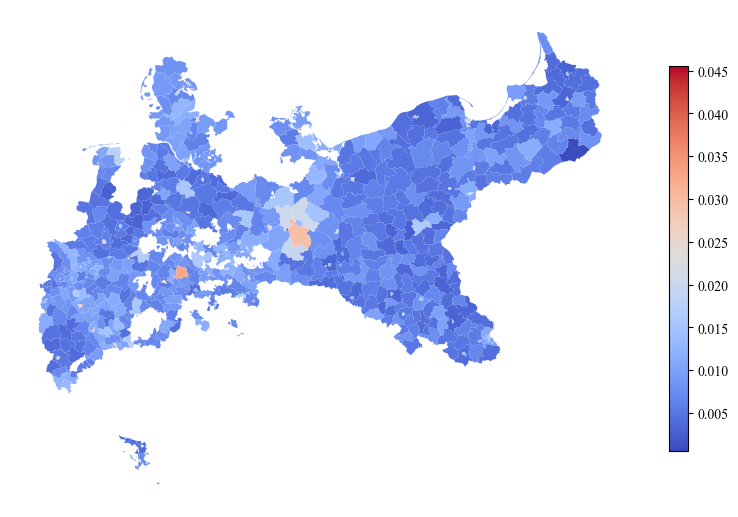

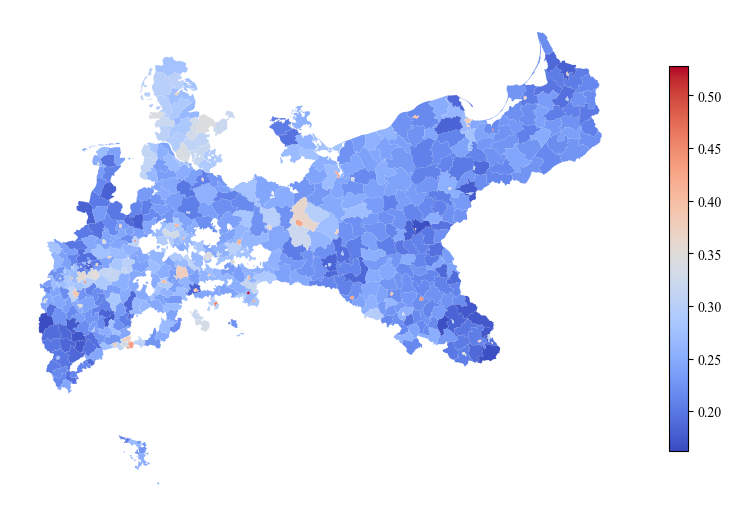

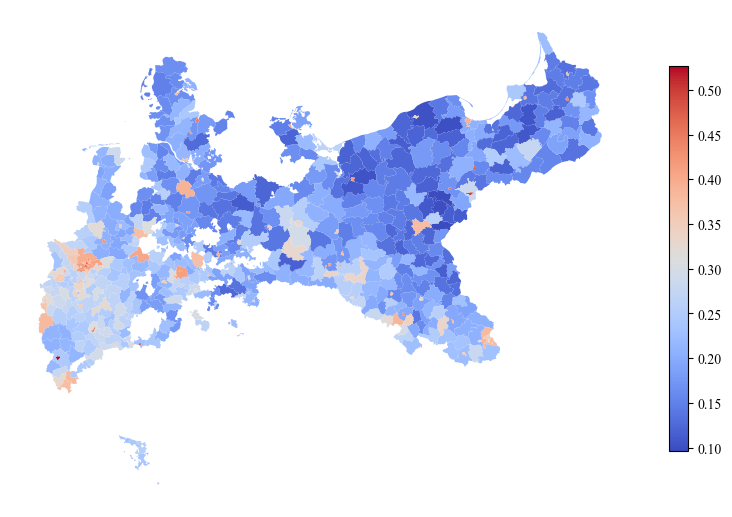

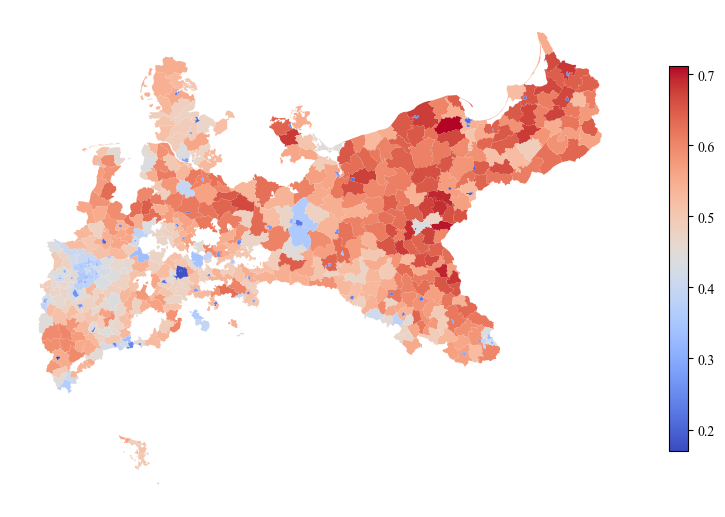

In [11]:
plt.rcParams["font.family"] = "Times New Roman"

columns_to_plot = ["per_high", "per_medium", "per_low", "per_unskilled"]

for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotting the data
    combined_data.plot(column=column, ax=ax, legend=False, cmap="coolwarm")
    
    # Turning off the axis
    ax.axis("off")
    
    # Get the mappable object for the colorbar
    mappable = ax.collections[0]
    
    # Create colorbar with adjusted size
    cbar = fig.colorbar(mappable, ax=ax, shrink=0.5)
    
    plt.show()

# EDA for description of original profession data

In [12]:
merged_data

,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,geometry,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_name
0,855.057882,196.230610,11000,ZERBST,K,11001,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,436.241729,151.840205,11000,DESSAU,K,11003,/,/,"POLYGON ((330133.589 5749059.269, 329077.200 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,408.685103,141.882085,11000,BERNBURG,K,11005,/,/,"MULTIPOLYGON (((277472.700 5763845.600, 278054...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362.501964,122.257485,11000,COETHEN,K,11004,/,/,"POLYGON ((296544.746 5744863.172, 296534.759 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335.383568,120.823802,11000,BALLENSTEDT,K,11006,/,/,"MULTIPOLYGON (((252119.900 5742750.000, 252311...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,310.911133,106.473495,1000,ISERLOHN,/,546,ARN,1,"POLYGON ((5360.700 5728030.000, 6420.500 57272...",545.0,1000.0,ISERLOHN,/,ARN,2.0,Iserlohn Stadt,Arnsberg
1058,8.736836,12.950638,1000,LUDENSCHEID,/,548,ARN,2,"POLYGON ((-2412.600 5710465.800, -2112.200 570...",549.0,1000.0,LUDENSCHEID,/,ARN,2.0,Luedenscheid,Arnsberg
1059,76.470957,60.356781,1000,FRANKFURT,/,597,WIE,2,"POLYGON ((53133.400 5572169.900, 53256.900 557...",597.0,1000.0,FRANKFURT,/,WIE,2.0,Frankfurt Main Stadt,Wiesbaden
1060,92.155299,59.425263,1000,MULHEIM,/,624,DUS,1,"POLYGON ((-61277.000 5732776.000, -60669.300 5...",623.0,1000.0,MULHEIM,/,DUS,2.0,Muelheim Ruhr Stadt,Duesseldorf


In [13]:
# Read the dta file into a DataFrame
profession_data = pd.read_stata(f"{occupation_path}\occupation_detailed.dta")

In [14]:
profession_data["d_Hauptberuf"] = profession_data["d_Hauptberuf_m"] + profession_data["d_Hauptberuf_w"]

In [15]:
# Calculate the sum of "d_Hauptberuf" for each of the values 'A', 'B', and 'F' in "i_Grossbuchstabe"
sum_all = profession_data["d_Hauptberuf"].sum()
sum_all_m = profession_data["d_Hauptberuf_m"].sum()
sum_all_w = profession_data["d_Hauptberuf_w"].sum()
sum_values_A = profession_data[profession_data["i_Grossbuchstabe"] == "A"]["d_Hauptberuf"].sum()
sum_values_A_m = profession_data[profession_data["i_Grossbuchstabe"] == "A"]["d_Hauptberuf_m"].sum()
sum_values_A_w = profession_data[profession_data["i_Grossbuchstabe"] == "A"]["d_Hauptberuf_w"].sum()
sum_values_B = profession_data[profession_data["i_Grossbuchstabe"] == "B"]["d_Hauptberuf"].sum()
sum_values_B_m = profession_data[profession_data["i_Grossbuchstabe"] == "B"]["d_Hauptberuf_m"].sum()
sum_values_B_w = profession_data[profession_data["i_Grossbuchstabe"] == "B"]["d_Hauptberuf_w"].sum()
sum_values_F = profession_data[profession_data["i_Grossbuchstabe"] == "F"]["d_Hauptberuf"].sum()

print(f"The are {sum_all} full time employed people. (Male: {sum_all_m}, Female: {sum_all_w})")
print(f"In the primary sector there are {sum_values_A} (M: {sum_values_A_m}, F:{sum_values_A_w}).")
print(f"in industry {sum_values_B} (M: {sum_values_B_m}, F: {sum_values_B_w}) and in the dropped category there are {sum_values_F}")

The are 17973256.0 full time employed people. (Male: 12223064.0, Female: 5750192.0)
In the primary sector there are 5857819.0 (M: 3143653.0, F:2714166.0).
in industry 6687715.0 (M: 5609988.0, F: 1077727.0) and in the dropped category there are 2067150.0


In [16]:
p = sum_values_A / (sum_all-sum_values_F)
p

0.36827486249620117

In [17]:
# Group by "id_inequality" and "i_Grossbuchstabe" and sum the "d_Hauptberuf" column
grouped_profession_data = profession_data.groupby(["id_inequality", "i_Grossbuchstabe"])["d_Hauptberuf"].sum().unstack().reset_index()

# Create a column for the total count of people
grouped_profession_data["total_people"] = profession_data.groupby("id_inequality")["d_Hauptberuf"].sum().values

# Extract only the columns of interest
final_profession_data = grouped_profession_data[["id_inequality", "A", "B", "total_people"]]
final_profession_data.columns = ["id_inequality", "people_in_A", "people_in_B", "total_people"]

# Make new columns with the shares
final_profession_data["share agri"] = final_profession_data["people_in_A"] / final_profession_data["total_people"]
final_profession_data["share industry"] = final_profession_data["people_in_B"] / final_profession_data["total_people"]

# Fill NaN values with 0
final_profession_data.fillna(0, inplace=True)

final_profession_data

C:\Users\soere\AppData\Local\Temp\ipykernel_11780\2824685315.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_profession_data["share agri"] = final_profession_data["people_in_A"] / final_profession_data["total_people"]
C:\Users\soere\AppData\Local\Temp\ipykernel_11780\2824685315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_profession_data["share industry"] = final_profession_data["people_in_B"] / final_profession_data["total_people"]
C:\Users\soere\AppData\Local\Temp\ipykernel_11780\

,id_inequality,people_in_A,people_in_B,total_people,share agri,share industry
0,1.0,13274.0,5584.0,30158.0,0.440149,0.185158
1,2.0,10853.0,4718.0,23486.0,0.462105,0.200886
2,4.0,2061.0,40968.0,115408.0,0.017858,0.354984
3,5.0,12786.0,3066.0,20358.0,0.628058,0.150604
4,6.0,16138.0,2859.0,23811.0,0.677754,0.120071
...,...,...,...,...,...,...
570,698.0,12008.0,3396.0,22227.0,0.540244,0.152787
571,699.0,7745.0,2566.0,13164.0,0.588347,0.194926
572,700.0,2972.0,1145.0,4776.0,0.622278,0.239740
573,701.0,7243.0,3909.0,12890.0,0.561908,0.303258


In [18]:
shares_agri_ind = merged_data.merge(final_profession_data, on="id_inequality", how="left")
shares_agri_ind

,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,geometry,id_inequality,...,STATUS_y,RB_y,TYPE_y,county_name,rb_name,people_in_A,people_in_B,total_people,share agri,share industry
0,855.057882,196.230610,11000,ZERBST,K,11001,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,436.241729,151.840205,11000,DESSAU,K,11003,/,/,"POLYGON ((330133.589 5749059.269, 329077.200 5...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,408.685103,141.882085,11000,BERNBURG,K,11005,/,/,"MULTIPOLYGON (((277472.700 5763845.600, 278054...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362.501964,122.257485,11000,COETHEN,K,11004,/,/,"POLYGON ((296544.746 5744863.172, 296534.759 5...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335.383568,120.823802,11000,BALLENSTEDT,K,11006,/,/,"MULTIPOLYGON (((252119.900 5742750.000, 252311...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,310.911133,106.473495,1000,ISERLOHN,/,546,ARN,1,"POLYGON ((5360.700 5728030.000, 6420.500 57272...",545.0,...,/,ARN,2.0,Iserlohn Stadt,Arnsberg,4105.0,26556.0,39740.0,0.103296,0.668244
1058,8.736836,12.950638,1000,LUDENSCHEID,/,548,ARN,2,"POLYGON ((-2412.600 5710465.800, -2112.200 570...",549.0,...,/,ARN,2.0,Luedenscheid,Arnsberg,9012.0,30598.0,48642.0,0.185272,0.629045
1059,76.470957,60.356781,1000,FRANKFURT,/,597,WIE,2,"POLYGON ((53133.400 5572169.900, 53256.900 557...",597.0,...,/,WIE,2.0,Frankfurt Main Stadt,Wiesbaden,5612.0,81497.0,176452.0,0.031805,0.461865
1060,92.155299,59.425263,1000,MULHEIM,/,624,DUS,1,"POLYGON ((-61277.000 5732776.000, -60669.300 5...",623.0,...,/,DUS,2.0,Muelheim Ruhr Stadt,Duesseldorf,2103.0,31497.0,50266.0,0.041837,0.626606


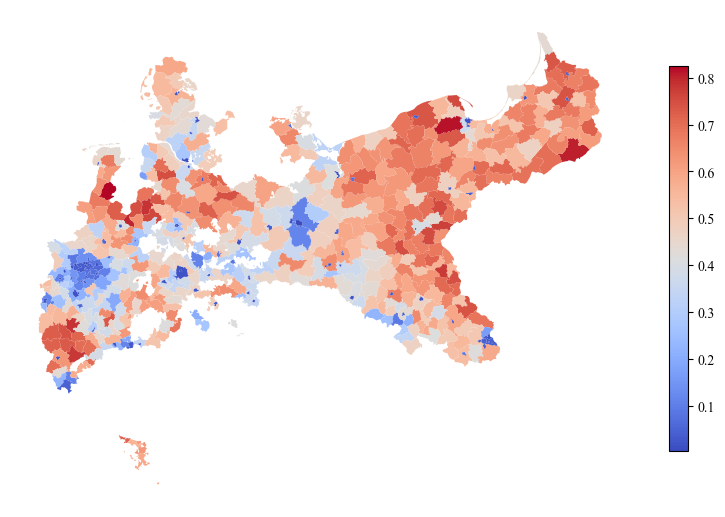

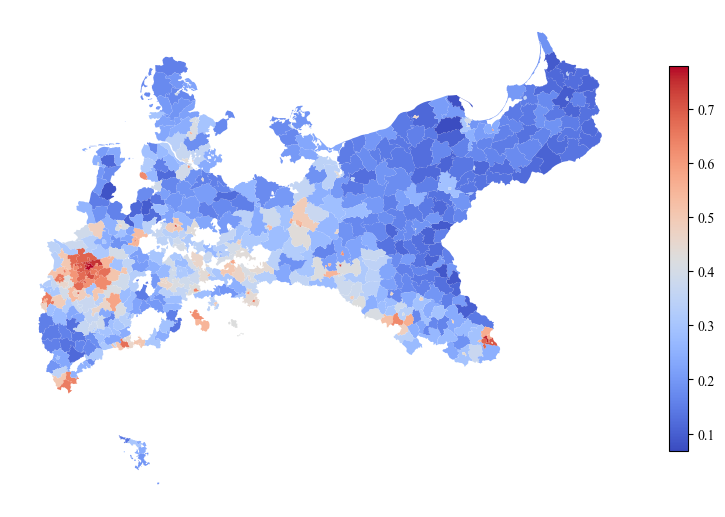

In [19]:
plt.rcParams["font.family"] = "Times New Roman"

columns_to_plot = ["share agri", "share industry"]

for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotting the data
    shares_agri_ind.plot(column=column, ax=ax, legend=False, cmap="coolwarm")
    
    # Turning off the axis
    ax.axis("off")
    
    # Get the mappable object for the colorbar
    mappable = ax.collections[0]
    
    # Create colorbar with adjusted size
    cbar = fig.colorbar(mappable, ax=ax, shrink=0.5)
    
    plt.show()

## Agriculture share

In [20]:
only_agri = profession_data[profession_data["i_Grossbuchstabe"] == "A"]
only_agri = only_agri[only_agri["i_Ziffer"] == 1]
sum_A1 = only_agri["d_Hauptberuf"].sum()
p = sum_A1 / (sum_all-sum_values_F)
p

0.35685138776266173

# Regierungsbezirke

In [21]:
merged_data

,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,geometry,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_name
0,855.057882,196.230610,11000,ZERBST,K,11001,/,/,"MULTIPOLYGON (((335960.400 5761583.000, 335675...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,436.241729,151.840205,11000,DESSAU,K,11003,/,/,"POLYGON ((330133.589 5749059.269, 329077.200 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,408.685103,141.882085,11000,BERNBURG,K,11005,/,/,"MULTIPOLYGON (((277472.700 5763845.600, 278054...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,362.501964,122.257485,11000,COETHEN,K,11004,/,/,"POLYGON ((296544.746 5744863.172, 296534.759 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335.383568,120.823802,11000,BALLENSTEDT,K,11006,/,/,"MULTIPOLYGON (((252119.900 5742750.000, 252311...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,310.911133,106.473495,1000,ISERLOHN,/,546,ARN,1,"POLYGON ((5360.700 5728030.000, 6420.500 57272...",545.0,1000.0,ISERLOHN,/,ARN,2.0,Iserlohn Stadt,Arnsberg
1058,8.736836,12.950638,1000,LUDENSCHEID,/,548,ARN,2,"POLYGON ((-2412.600 5710465.800, -2112.200 570...",549.0,1000.0,LUDENSCHEID,/,ARN,2.0,Luedenscheid,Arnsberg
1059,76.470957,60.356781,1000,FRANKFURT,/,597,WIE,2,"POLYGON ((53133.400 5572169.900, 53256.900 557...",597.0,1000.0,FRANKFURT,/,WIE,2.0,Frankfurt Main Stadt,Wiesbaden
1060,92.155299,59.425263,1000,MULHEIM,/,624,DUS,1,"POLYGON ((-61277.000 5732776.000, -60669.300 5...",623.0,1000.0,MULHEIM,/,DUS,2.0,Muelheim Ruhr Stadt,Duesseldorf


In [22]:
counties_Allenstein = [15, 16, 19, 20, 21, 40, 41, 42, 43]
merged_data.loc[merged_data["id_inequality"].isin(counties_Allenstein) , "rb_id"] = 37
merged_data.loc[merged_data["id_inequality"].isin(counties_Allenstein) , "rb_name"] = "Allenstein"

In [23]:
# Aggregate data to district level by calculating the mean of the classification values
province_data = merged_data.groupby("rb_name").agg({
    'geometry': 'first'  # Just keep one geometry for later merging
}).reset_index()

province_data

,rb_name,geometry
0,Aachen,"POLYGON ((-108566.800 5704920.000, -108741.900..."
1,Allenstein,"POLYGON ((921453.500 5959940.200, 922282.200 5..."
2,Arnsberg,"POLYGON ((76653.700 5720981.500, 76348.200 572..."
3,Aurich,"POLYGON ((27040.200 5936542.400, 27198.600 593..."
4,Berlin,"POLYGON ((397680.800 5814667.700, 396578.900 5..."
5,Breslau,"POLYGON ((591858.000 5636759.000, 592158.000 5..."
6,Bromberg,"POLYGON ((707917.400 5817090.500, 705366.700 5..."
7,Danzig,"POLYGON ((803303.200 6046187.300, 802451.900 6..."
8,Duesseldorf,"POLYGON ((-108123.200 5780729.600, -108090.700..."
9,Erfurt,"POLYGON ((162330.400 5709729.600, 162711.100 5..."


In [24]:
# Specify aggregation methods for each column
aggregation_methods = {column: ("mean" if merged_data[column].dtype == "float64" else "first")
                       for column in merged_data.columns if column != "rb_name"}

# Exclude the 'geometry' column from the aggregation methods dictionary
if "geometry" in aggregation_methods:
    del aggregation_methods["geometry"]

# Dissolve the boundaries using the modified aggregation methods
province_shape = merged_data.dissolve(by='rb_name', aggfunc=aggregation_methods)

# Reset the index
province_shape.reset_index(inplace=True)

province_shape.head()

,rb_name,geometry,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_id
0,Aachen,"POLYGON ((-111231.917 5616437.133, -111132.500...",376.499490,103.580059,1000,ERKELENZ,/,687,AAC,0,692.545455,1000.0,ERKELENZ,/,AAC,0.272727,Erkelenz,NaN
1,Allenstein,"POLYGON ((879920.300 5924018.900, 878257.200 5...",1347.722732,221.012514,1000,ORTELSBURG,/,19,KON,0,28.555556,1000.0,ORTELSBURG,/,KON,0.000000,Ortelsburg,37.0
2,Arnsberg,"POLYGON ((-31537.900 5704500.300, -32824.400 5...",280.093751,78.547685,1000,BRILON,/,520,ARN,0,534.560000,1000.0,BRILON,/,ARN,0.920000,Brilon,NaN
3,Aurich,"MULTIPOLYGON (((-14225.200 5911886.000, -18885...",455.489784,126.462438,1000,LEER,/,487,AUR,0,484.857143,1000.0,LEER,/,AUR,0.428571,Leer,NaN
4,Berlin,"POLYGON ((397680.800 5814667.700, 396578.900 5...",129.550276,46.983643,1000,BERLIN,/,78,BER,0,78.000000,1000.0,BERLIN,/,BER,0.000000,Berlin,NaN


In [25]:
# Load data on landholdings of farms with 100 or more hectares
farmer_data = pd.read_excel(f"{map_path}\Major Farmers Landholdings.xlsx")
farmer_data["rb_id"] = farmer_data["rb_id"].astype(float)
farmer_data

,rb_name,rb_id,landholdings in per
0,Aachen,1.0,4.4
1,Allenstein,37.0,30.8
2,Arnsberg,2.0,4.3
3,Aurich,3.0,3.8
4,Breslau,5.0,41.6
5,Bromberg,6.0,44.4
6,Danzig,7.0,31.9
7,Duesseldorf,8.0,3.1
8,Erfurt,9.0,15.6
9,Frankfurt,10.0,35.3


In [26]:
# Merge the aggregated data with the province-level shapefile based on 'rb_name'
province_merged = province_shape.merge(province_data[["rb_name"]], on="rb_name")
province_merged = province_merged.merge(farmer_data[["rb_name", "landholdings in per"]], on="rb_name")

province_merged.head(40)

,rb_name,geometry,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_id,landholdings in per
0,Aachen,"POLYGON ((-111231.917 5616437.133, -111132.500...",376.499490,103.580059,1000,ERKELENZ,/,687,AAC,0,692.545455,1000.0,ERKELENZ,/,AAC,0.272727,Erkelenz,NaN,4.4
1,Allenstein,"POLYGON ((879920.300 5924018.900, 878257.200 5...",1347.722732,221.012514,1000,ORTELSBURG,/,19,KON,0,28.555556,1000.0,ORTELSBURG,/,KON,0.000000,Ortelsburg,37.0,30.8
2,Arnsberg,"POLYGON ((-31537.900 5704500.300, -32824.400 5...",280.093751,78.547685,1000,BRILON,/,520,ARN,0,534.560000,1000.0,BRILON,/,ARN,0.920000,Brilon,NaN,4.3
3,Aurich,"MULTIPOLYGON (((-14225.200 5911886.000, -18885...",455.489784,126.462438,1000,LEER,/,487,AUR,0,484.857143,1000.0,LEER,/,AUR,0.428571,Leer,NaN,3.8
4,Berlin,"POLYGON ((397680.800 5814667.700, 396578.900 5...",129.550276,46.983643,1000,BERLIN,/,78,BER,0,78.000000,1000.0,BERLIN,/,BER,0.000000,Berlin,NaN,0.0
5,Breslau,"POLYGON ((637245.200 5577526.000, 638329.000 5...",520.308984,117.449578,1000,WALDENBURG,/,240,BRE,0,228.880000,1000.0,WALDENBURG,/,BRE,0.320000,Waldenburg,NaN,41.6
6,Bromberg,"POLYGON ((658777.100 5820355.500, 658766.100 5...",828.942522,157.372484,1000,WITKOWO,/,214,BRO,0,207.071429,1000.0,WITKOWO,/,BRO,0.214286,Witkowo,NaN,44.4
7,Danzig,"POLYGON ((739995.400 5964869.300, 738703.000 5...",671.646090,165.804942,1000,DANZIG NIEDERUNG,/,51,DAN,0,51.916667,1000.0,DANZIG NIEDERUNG,/,DAN,0.416667,Danzig Niederung,NaN,31.9
8,Duesseldorf,"POLYGON ((-89838.000 5686062.800, -90503.400 5...",208.572682,69.933579,1000,KLEVE,/,614,DUS,0,635.230769,1000.0,KLEVE,/,DUS,1.076923,Kleve,NaN,3.1
9,Erfurt,"MULTIPOLYGON (((195767.200 5618342.700, 195951...",296.013931,101.909944,1000,HEILIGENSTADT,/,357,ERF,0,360.416667,1000.0,HEILIGENSTADT,/,ERF,0.666667,Heiligenstadt,NaN,15.6


C:\Users\soere\AppData\Local\Temp\ipykernel_11780\463372706.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_yticklabels([f"{x:.0f}%" for x in cbar.get_yticks()])


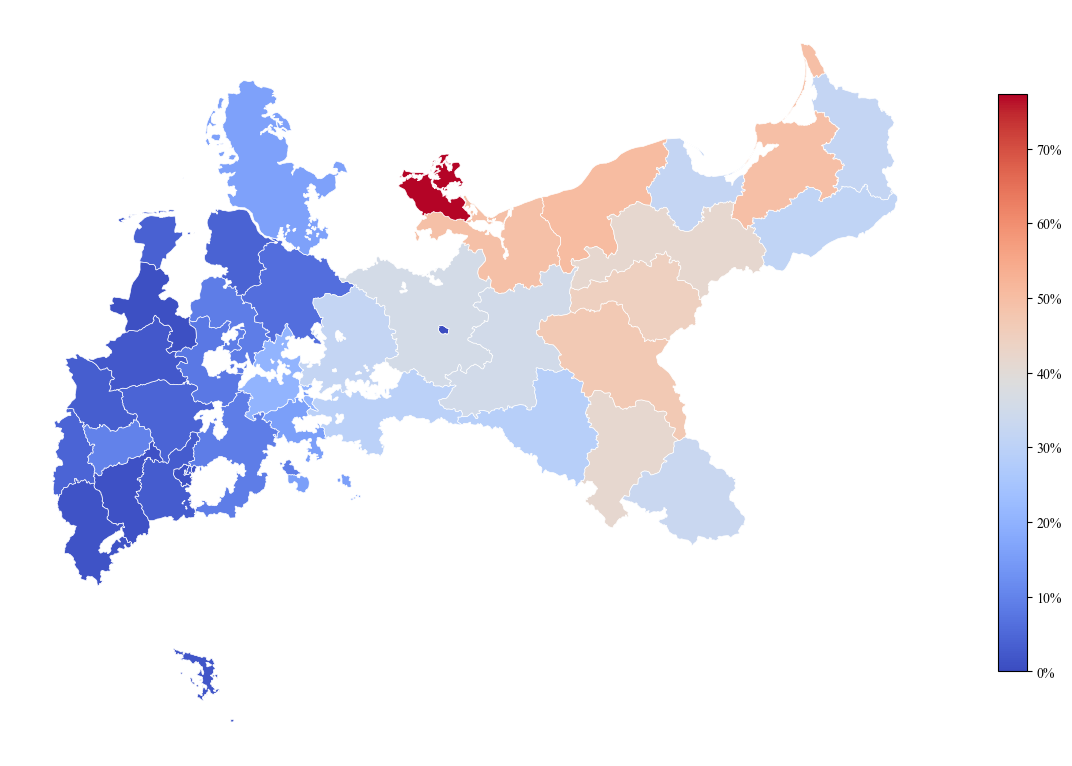

In [27]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the merged province-level data with classification coloring
province_merged.plot(column="landholdings in per", ax=ax, legend=True,
                     cmap="coolwarm", edgecolor="white", linewidth=0.5,
                     legend_kwds={"shrink": 0.5})

# Customize the colorbar labels to display as percentages
cbar = ax.get_figure().get_axes()[1]
cbar.set_yticklabels([f"{x:.0f}%" for x in cbar.get_yticks()])

# remove axis for better visualization
ax.axis('off')

plt.show()


In [28]:
max_pr = province_merged["landholdings in per"].max()
province_w_max = province_merged[province_merged["landholdings in per"] == max_pr]
province_w_max

,rb_name,geometry,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_id,landholdings in per
34,Stralsund,"MULTIPOLYGON (((420208.100 5970438.000, 419931...",802.070087,220.865942,1000,GRIMMEN,/,168,STR,0,163.8,1000.0,GRIMMEN,/,STR,0.4,Grimmen,NaN,77.3


In [29]:
# Get the two smallest values
two_smallest = province_merged["landholdings in per"].nsmallest(2)

# Extract the second smallest
second_smallest_value = two_smallest.iloc[-1]

# Find the rows in the DataFrame that correspond to this value
province_with_second_lowest = province_merged[province_merged["landholdings in per"] == second_smallest_value]
province_with_second_lowest

,rb_name,geometry,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_id,landholdings in per
27,Osnabrueck,"POLYGON ((-4423.300 5834936.500, -3004.500 583...",568.310353,108.987261,1000,BERSENBRUCK,/,474,OSN,0,474.454545,1000.0,BERSENBRUCK,/,OSN,0.272727,Bersenbrueck,NaN,0.7


In [30]:
province_merged

,rb_name,geometry,AREA,PERIMETER,LAND_x,NAME_x,STATUS_x,ID,RB_x,TYPE_x,id_inequality,LAND_y,NAME_y,STATUS_y,RB_y,TYPE_y,county_name,rb_id,landholdings in per
0,Aachen,"POLYGON ((-111231.917 5616437.133, -111132.500...",376.499490,103.580059,1000,ERKELENZ,/,687,AAC,0,692.545455,1000.0,ERKELENZ,/,AAC,0.272727,Erkelenz,NaN,4.4
1,Allenstein,"POLYGON ((879920.300 5924018.900, 878257.200 5...",1347.722732,221.012514,1000,ORTELSBURG,/,19,KON,0,28.555556,1000.0,ORTELSBURG,/,KON,0.000000,Ortelsburg,37.0,30.8
2,Arnsberg,"POLYGON ((-31537.900 5704500.300, -32824.400 5...",280.093751,78.547685,1000,BRILON,/,520,ARN,0,534.560000,1000.0,BRILON,/,ARN,0.920000,Brilon,NaN,4.3
3,Aurich,"MULTIPOLYGON (((-14225.200 5911886.000, -18885...",455.489784,126.462438,1000,LEER,/,487,AUR,0,484.857143,1000.0,LEER,/,AUR,0.428571,Leer,NaN,3.8
4,Berlin,"POLYGON ((397680.800 5814667.700, 396578.900 5...",129.550276,46.983643,1000,BERLIN,/,78,BER,0,78.000000,1000.0,BERLIN,/,BER,0.000000,Berlin,NaN,0.0
5,Breslau,"POLYGON ((637245.200 5577526.000, 638329.000 5...",520.308984,117.449578,1000,WALDENBURG,/,240,BRE,0,228.880000,1000.0,WALDENBURG,/,BRE,0.320000,Waldenburg,NaN,41.6
6,Bromberg,"POLYGON ((658777.100 5820355.500, 658766.100 5...",828.942522,157.372484,1000,WITKOWO,/,214,BRO,0,207.071429,1000.0,WITKOWO,/,BRO,0.214286,Witkowo,NaN,44.4
7,Danzig,"POLYGON ((739995.400 5964869.300, 738703.000 5...",671.646090,165.804942,1000,DANZIG NIEDERUNG,/,51,DAN,0,51.916667,1000.0,DANZIG NIEDERUNG,/,DAN,0.416667,Danzig Niederung,NaN,31.9
8,Duesseldorf,"POLYGON ((-89838.000 5686062.800, -90503.400 5...",208.572682,69.933579,1000,KLEVE,/,614,DUS,0,635.230769,1000.0,KLEVE,/,DUS,1.076923,Kleve,NaN,3.1
9,Erfurt,"MULTIPOLYGON (((195767.200 5618342.700, 195951...",296.013931,101.909944,1000,HEILIGENSTADT,/,357,ERF,0,360.416667,1000.0,HEILIGENSTADT,/,ERF,0.666667,Heiligenstadt,NaN,15.6
